In [1]:
import PyPDF2
from langchain_community.embeddings import OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain_community.chat_models import ChatOllama
from langchain_groq import ChatGroq
from langchain.memory import ChatMessageHistory, ConversationBufferMemory
import chainlit as cl

2024-03-11 20:31:51 - Loaded .env file


In [24]:
import os, wget
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.embeddings.fastembed import FastEmbedEmbeddings
from langchain_community.document_loaders import TextLoader

from IPython.display import Markdown, display

In [3]:
def printmd(string):
	display(Markdown(string))

In [1]:


# Update with your API URL if using a hosted instance of Langsmith.
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "ls__b338d581f71b48b099c981bf36b095b6"  # Update with your API key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
project_name = "groq"  # Update with your project name
os.environ["LANGCHAIN_PROJECT"] = project_name  # Optional: "default" is used if not set

In [1]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)
from dotenv import load_dotenv
# safe ={
# 	HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
# 	HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
# 	HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
# 	HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
# 	}

# generation_config = {
#   "temperature": 0.9,
#   "top_p": 1,
#   "top_k": 1,
#   "max_output_tokens": 10000,
# }

In [4]:
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

In [2]:
# llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro-latest", convert_system_message_to_human=True, generation_config=generation_config,safety_settings=safe, embeddings=OllamaEmbeddings(model="nomic-embed-text"))
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro-latest", convert_system_message_to_human=True)


In [3]:
llm

ChatGoogleGenerativeAI(model='gemini-1.0-pro-latest', client= genai.GenerativeModel(
   model_name='models/gemini-1.0-pro-latest',
   generation_config={}.
   safety_settings={}
), convert_system_message_to_human=True)

In [4]:
dir(llm)

['Config',
 'InputType',
 'OutputType',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__ror__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_updat

In [8]:
print(llm.temperature)

0.7


In [ ]:
llm_local = ChatOllama(model="mistral:instruct")
llm_groq = ChatGroq(
            #groq_api_key=groq_api_key,
            #model_name='llama2-70b-4096' 
            model_name='mixtral-8x7b-32768'
    )

In [3]:


# embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")


In [13]:
# open the_prince.txt and read the text
with open('the_prince.txt', 'r') as file:
    text = file.read()	
len(text)
# loader = TextLoader('the_prince.txt')
# documents = loader.load()

301896

In [14]:
# loader = PyPDFLoader("Machiavelli_The_Prince.pdf")
# pages = loader.load_and_split()

# text = " ".join(page.page_content for page in pages)

In [25]:
# embeddings_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
# embeddings_model = FastEmbedEmbeddings()
embeddings = OllamaEmbeddings(model="nomic-embed-text")

In [14]:
%%time
# Initialize the semantic chunker with the pre-generated embeddings
chunker = SemanticChunker(embeddings_model)

# Split the text into chunks based on the embeddings
chunks = chunker.create_documents([text])    

CPU times: user 4.28 s, sys: 63.7 ms, total: 4.34 s
Wall time: 14.1 s


In [26]:
%%time
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=2000,
    chunk_overlap=100,
    length_function=len,
    is_separator_regex=False,
)

texts = text_splitter.create_documents([text])

CPU times: user 9.25 ms, sys: 0 ns, total: 9.25 ms
Wall time: 9.08 ms


In [41]:

embeddings_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
# db = FAISS.from_documents(texts, embeddings_model)
db = Chroma.from_documents(texts, embeddings_model)


In [42]:
query = "How did Francesco Sforza rose to be Duke of Milan?"
docs = db.similarity_search(query)

# print results


In [43]:
for i in range(3):	
	printmd(docs[i].page_content)

Concerning these two methods of rising to be a prince by ability or
fortune, I wish to adduce two examples within our own recollection, and
these are Francesco Sforza[2] and Cesare Borgia. Francesco, by proper
means and with great ability, from being a private person rose to be
Duke of Milan, and that which he had acquired with a thousand anxieties
he kept with little trouble. On the other hand, Cesare Borgia, called
by the people Duke Valentino, acquired his state during the ascendancy
of his father, and on its decline he lost it, notwithstanding that he
had taken every measure and done all that ought to be done by a wise
and able man to fix firmly his roots in the states which the arms and
fortunes of others had bestowed on him.

 [2] Francesco Sforza, born 1401, died 1466. He married Bianca Maria
 Visconti, a natural daughter of Filippo Visconti, the Duke of Milan,
 on whose death he procured his own elevation to the duchy. Machiavelli
 was the accredited agent of the Florentine Republic to Cesare Borgia
 (1478-1507) during the transactions which led up to the assassinations
 of the Orsini and Vitelli at Sinigalia, and along with his letters to
 his chiefs in Florence he has left an account, written ten years
 before _The Prince_, of the proceedings of the duke in his
 “Descritione del modo tenuto dal duca Valentino nello ammazzare
 Vitellozzo Vitelli,” etc., a translation of which is appended to the
 present work.

Alexander the Sixth, in wishing to aggrandize the duke, his son, had
many immediate and prospective difficulties. Firstly, he did not see
his way to make him master of any state that was not a state of the
Church; and if he was willing to rob the Church he knew that the Duke
of Milan and the Venetians would not consent, because Faenza and Rimini
were already under the protection of the Venetians. Besides this, he
saw the arms of Italy, especially those by which he might have been
assisted, in hands that would fear the aggrandizement of the Pope,
namely, the Orsini and the Colonnesi and their following. It behoved
him, therefore, to upset this state of affairs and embroil the powers,
so as to make himself securely master of part of their states. This was
easy for him to do, because he found the Venetians, moved by other
reasons, inclined to bring back the French into Italy; he would not
only not oppose this, but he would render it more easy by dissolving
the former marriage of King Louis. Therefore the king came into Italy
with the assistance of the Venetians and the consent of Alexander. He
was no sooner in Milan than the Pope had soldiers from him for the
attempt on the Romagna, which yielded to him on the reputation of the
king. The duke, therefore, having acquired the Romagna and beaten the
Colonnesi, while wishing to hold that and to advance further, was
hindered by two things: the one, his forces did not appear loyal to
him, the other, the goodwill of France: that is to say, he feared that
the forces of the Orsini, which he was using, would not stand to him,
that not only might they hinder him from winning more, but might
themselves seize what he had won, and that the king might also do the
same. Of the Orsini he had a warning when, after taking Faenza and
attacking Bologna, he saw them go very unwillingly to that attack. And
as to the king, he learned his mind when he himself, after taking the

Frederick, having appointed a governor in Rome to watch his Italian
affairs, returned to Germany. All the Tuscan and Lombardian
Ghibellines, who followed the imperial lead, had recourse to Castruccio
for help and counsel, and all promised him the governorship of his
country, if enabled to recover it with his assistance. Among these
exiles were Matteo Guidi, Nardo Scolari, Lapo Uberti, Gerozzo Nardi,
and Piero Buonaccorsi, all exiled Florentines and Ghibellines.
Castruccio had the secret intention of becoming the master of all
Tuscany by the aid of these men and of his own forces; and in order to
gain greater weight in affairs, he entered into a league with Messer
Matteo Visconti, the Prince of Milan, and organized for him the forces
of his city and the country districts. As Lucca had five gates, he
divided his own country districts into five parts, which he supplied
with arms, and enrolled the men under captains and ensigns, so that he
could quickly bring into the field twenty thousand soldiers, without
those whom he could summon to his assistance from Pisa. While he
surrounded himself with these forces and allies, it happened at Messer
Matteo Visconti was attacked by the Guelphs of Piacenza, who had driven
out the Ghibellines with the assistance of a Florentine army and the
King Ruberto. Messer Matteo called upon Castruccio to invade the
Florentines in their own territories, so that, being attacked at home,
they should be compelled to draw their army out of Lombardy in order to
defend themselves. Castruccio invaded the Valdarno, and seized
Fucecchio and San Miniato, inflicting immense damage upon the country.
Whereupon the Florentines recalled their army, which had scarcely
reached Tuscany, when Castruccio was forced by other necessities to
return to Lucca.

In [20]:
import matplotlib.pyplot as plt
import tiktoken

In [21]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

<function matplotlib.pyplot.show(close=None, block=None)>

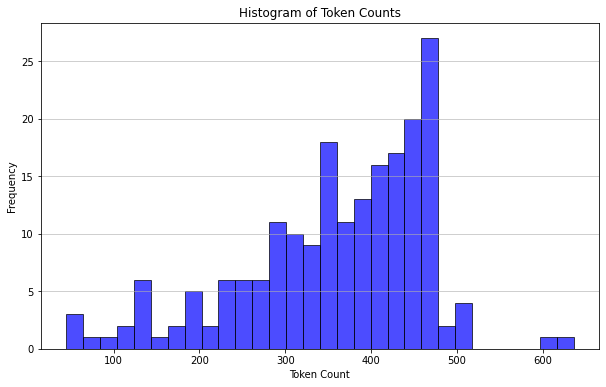

In [27]:
docs_texts = [d.page_content for d in texts]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show